# Project: Milestone 2

*  Student Name: Abraham Abate
*  Instructor: Catherine Williams
*  DSC540: Data Preparation
*  Data Science Dept., BU
*  Date: 10/03/2024

### Cleaning/Formatting Flat File Source
Perform at least 5 data transformation and/or cleansing steps to your flat file data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformations. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone.

**Examples:**
* Replace Headers
* Format data into a more readable format
* Identify outliers and bad data
* Find duplicates
* Fix casing or inconsistent values
* Conduct Fuzzy Matching

Make sure you clearly number and label each transformation step (Step #1, Step #2, etc.) in your code and describe what it is doing in 1-2 sentences.
You must submit the following:
1. Jupyter Notebook File or PDF of your code with Milestone # listed.
2. Each transformation should be labeled with description or what it is doing.
3. Human readable dataset after all transformations should be printed at the end of your notebook.


In [28]:
# Load libraries
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [29]:
# Path to your zip file
zip_file_path = "./datasets/US_counties_COVID19_health_weather_data.zip"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # List all files in the zip
    print(z.namelist())
    
    # Read the CSV file
    with z.open('US_counties_COVID19_health_weather_data.csv') as f:
        raw_df = pd.read_csv(f)

raw_df.head()

['US_counties_COVID19_health_weather_data.csv']


,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23


In [30]:
raw_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths',
       'stay_at_home_announced', 'stay_at_home_effective', 'lat', 'lon',
       ...
       'min_temp_3d_avg', 'min_temp_5d_avg', 'min_temp_10d_avg',
       'min_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg',
       'dewpoint_10d_avg', 'dewpoint_15d_avg', 'date_stay_at_home_announced',
       'date_stay_at_home_effective'],
      dtype='object', length=227)

In [31]:
# Check the shape of the dataframe
raw_df.shape

(790331, 227)

In [35]:
# Select variable for the weather data
# Select the first 3 columns
first_3_columns = raw_df.iloc[:, :3]

# Select the remaining columns- weather data columns
last_36_columns = raw_df.iloc[:, -36:-2]

# Combine the two selections
weather_df = pd.concat([first_3_columns, last_36_columns], axis=1)
weather_df.head()

,date,county,state,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
0,2020-01-21,Snohomish,Washington,44.1,37.0,50.0,40.3,1006.3,1.0,9.9,...,51.01,48.433333,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333
1,2020-01-22,Snohomish,Washington,44.8,37.9,48.0,40.3,1014.3,8.5,9.6,...,51.82,49.486667,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000
2,2020-01-23,Snohomish,Washington,49.9,42.8,54.0,47.3,1014.5,9.1,10.0,...,51.75,50.233333,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000
3,2020-01-24,Cook,Illinois,36.1,34.0,39.0,34.7,1013.4,989.6,2.5,...,34.91,33.693333,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333
4,2020-01-24,Snohomish,Washington,51.5,48.0,54.0,46.6,1011.9,6.4,9.6,...,51.44,51.093333,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333


In [36]:
# Handle the missing value using forward fill method
weather_df.ffill(inplace=True)

In [37]:
# Rename a state code column
weather_df.rename(columns={'state': 'State'}, inplace=True)

# Check the shape of the dataframe
print(weather_df.shape)
weather_df.head()

(790331, 37)


,date,county,State,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
0,2020-01-21,Snohomish,Washington,44.1,37.0,50.0,40.3,1006.3,1.0,9.9,...,51.01,48.433333,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333
1,2020-01-22,Snohomish,Washington,44.8,37.9,48.0,40.3,1014.3,8.5,9.6,...,51.82,49.486667,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000
2,2020-01-23,Snohomish,Washington,49.9,42.8,54.0,47.3,1014.5,9.1,10.0,...,51.75,50.233333,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000
3,2020-01-24,Cook,Illinois,36.1,34.0,39.0,34.7,1013.4,989.6,2.5,...,34.91,33.693333,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333
4,2020-01-24,Snohomish,Washington,51.5,48.0,54.0,46.6,1011.9,6.4,9.6,...,51.44,51.093333,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333


In [38]:
# Save the cleaned DataFrame as a CSV file
weather_df.to_csv('weather_df.csv', index=False)

In [39]:
weather_df.columns

Index(['date', 'county', 'State', 'mean_temp', 'min_temp', 'max_temp',
       'dewpoint', 'sea_level_pressure', 'station_pressure', 'visibility',
       'wind_speed', 'max_wind_speed', 'wind_gust', 'precipitation',
       'precip_flag', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado',
       'mean_temp_3d_avg', 'mean_temp_5d_avg', 'mean_temp_10d_avg',
       'mean_temp_15d_avg', 'max_temp_3d_avg', 'max_temp_5d_avg',
       'max_temp_10d_avg', 'max_temp_15d_avg', 'min_temp_3d_avg',
       'min_temp_5d_avg', 'min_temp_10d_avg', 'min_temp_15d_avg',
       'dewpoint_3d_avg', 'dewpoint_5d_avg', 'dewpoint_10d_avg',
       'dewpoint_15d_avg'],
      dtype='object')

In [40]:
# select DataFrame columns for summary statistics
selected_columns = weather_df[['mean_temp', 'min_temp', 'max_temp', 'dewpoint', 'visibility']]
summary_statistics = selected_columns.describe()
print(summary_statistics)

           mean_temp       min_temp       max_temp       dewpoint  \
count  790331.000000  790331.000000  790331.000000  790331.000000   
mean       63.543055      52.737062      76.157590      51.146164   
std        14.783388      15.362909      15.380831      16.467172   
min       -31.200000     -36.000000     -18.900000     -37.600000   
25%        53.700000      41.900000      66.900000      38.800000   
50%        66.300000      54.500000      79.300000      53.600000   
75%        75.300000      65.300000      87.800000      65.200000   
max       109.600000     100.900000     129.200000      83.900000   

          visibility  
count  790331.000000  
mean        9.381259  
std         1.190524  
min         0.000000  
25%         9.200000  
50%         9.900000  
75%        10.000000  
max        70.800000  


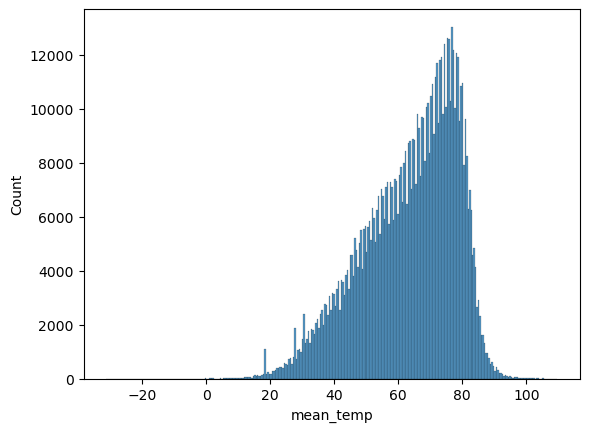

In [41]:
# Identify outliers 

# first Visual inspection using a histogram
sns.histplot(weather_df["mean_temp"])
plt.show()

In [42]:
# Statistical method: Z-score to identify outlier
z_scores = (weather_df["mean_temp"] - weather_df["mean_temp"].mean()) / weather_df["mean_temp"].std()
outliers = weather_df["mean_temp"][z_scores > 3]
outliers

350862    108.0
430639    108.9
449847    109.6
453049    108.1
462657    108.6
501126    108.1
501131    108.4
504332    109.6
Name: mean_temp, dtype: float64

In [43]:
# Aggregate the dataframe coumn by state name and date
grouped_weather_df = weather_df.groupby(['State','date']).mean(numeric_only =True)
grouped_weather_df.head()

mean_temp   min_temp   max_temp   dewpoint  \
State   date                                                     
Alabama 2020-03-13    68.3800  60.540000  78.000000  59.660000   
        2020-03-14    64.7000  56.533333  77.333333  51.166667   
        2020-03-15    65.9000  57.737500  76.375000  54.475000   
        2020-03-16    62.4375  55.300000  75.412500  51.250000   
        2020-03-17    65.7600  59.590000  75.880000  55.180000   

                    sea_level_pressure  station_pressure  visibility  \
State   date                                                           
Alabama 2020-03-13         1018.000000        405.280000       9.600   
        2020-03-14         1023.633333        155.683333       8.900   
        2020-03-15         1024.962500        240.437500       9.475   
        2020-03-16         1024.487500        240.600000       9.475   
        2020-03-17         1022.430000        291.040000       8.290   

                    wind_speed  max_wind_speed  wind_gust  ...  \
State   date                                               ...   
Alabama 2020-03-13    6.480000       11.340000      22.62  ...   
        2020-03-14    3.733333        9.133333      22.90  ...   
        2020-03-15    3.162500       10.000000      25.10  ...   
        2020-03-16    4.200000        8.475000      26.00  ...   
        2020-03-17    3.380000        8.130000      15.00  ...   

                    max_temp_10d_avg  max_temp_15d_avg  min_temp_3d_avg  \
State   date                                                              
Alabama 2020-03-13         76.462000         74.662667        58.013333   
        2020-03-14         75.873333         74.135556        57.888889   
        2020-03-15         76.978750         74.612500        56.600000   
        2020-03-16         77.236250         74.965833        57.733333   
        2020-03-17         75.516000         74.896667        57.456667   

                    min_temp_5d_avg  min_temp_10d_avg  min_temp_15d_avg  \
State   date                                                              
Alabama 2020-03-13        57.216000         55.874000         53.342667   
        2020-03-14        57.346667         58.316667         55.132222   
        2020-03-15        58.217500         59.448750         56.366667   
        2020-03-16        58.040000         59.567500         57.696667   
        2020-03-17        58.526000         57.841000         57.990000   

                    dewpoint_3d_avg  dewpoint_5d_avg  dewpoint_10d_avg  \
State   date                                                             
Alabama 2020-03-13        58.493333        58.324000         56.378000   
        2020-03-14        52.522222        51.946667         52.443333   
        2020-03-15        52.912500        53.770000         55.003750   
        2020-03-16        53.350000        53.730000         54.732500   
        2020-03-17        54.213333        55.284000         54.242000   

                    dewpoint_15d_avg  
State   date                          
Alabama 2020-03-13         52.442667  
        2020-03-14         48.583333  
        2020-03-15         51.266667  
        2020-03-16         53.045000  
        2020-03-17         54.715333  

[5 rows x 33 columns]

In [44]:
# CHeck the shape of the aggregated df
grouped_weather_df.shape

(14776, 33)

In [45]:
# Aggregate the dataframe coumn 
grouped_by_state_df = weather_df.groupby(['State', 'county']).mean(numeric_only =True)
grouped_by_state_df.head()

mean_temp   min_temp   max_temp   dewpoint  \
State   county                                                
Alabama Autauga  71.674609  62.904297  82.875781  60.770703   
        Baldwin  73.153383  67.307143  79.541353  59.288346   
        Barbour  70.830488  62.298374  81.945935  60.958943   
        Bibb     69.717200  61.291200  80.879600  60.052000   
        Blount   65.817647  56.191373  77.829804  60.089804   

                 sea_level_pressure  station_pressure  visibility  wind_speed  \
State   county                                                                  
Alabama Autauga         1017.042578         38.594922    9.417578    4.080469   
        Baldwin         1016.925564         70.231579    9.408647    4.013534   
        Barbour         1016.726016         39.806504    9.403659    2.901626   
        Bibb            1016.998800        838.388800    9.202400    3.084000   
        Blount          1016.958431        822.109412    9.210588    3.652157   

                 max_wind_speed  wind_gust  ...  max_temp_10d_avg  \
State   county                              ...                     
Alabama Autauga       10.834766  24.292969  ...         82.356797   
        Baldwin       10.025940  24.218421  ...         79.087782   
        Barbour        8.765041  24.450407  ...         81.540000   
        Bibb           8.814000  23.174800  ...         80.654800   
        Blount         9.209020  23.089412  ...         77.581882   

                 max_temp_15d_avg  min_temp_3d_avg  min_temp_5d_avg  \
State   county                                                        
Alabama Autauga         82.103281        62.821875        62.707031   
        Baldwin         78.820000        67.218797        67.129398   
        Barbour         81.283144        62.246612        62.166829   
        Bibb            80.428507        61.278533        61.244240   
        Blount          77.368837        56.179739        56.162431   

                 min_temp_10d_avg  min_temp_15d_avg  dewpoint_3d_avg  \
State   county                                                         
Alabama Autauga         62.375508         62.246927        59.072396   
        Baldwin         66.800789         66.620451        57.649875   
        Barbour         61.821829         61.626694        59.186179   
        Bibb            61.006680         60.905307        59.948000   
        Blount          55.951451         55.887843        59.974248   

                 dewpoint_5d_avg  dewpoint_10d_avg  dewpoint_15d_avg  
State   county                                                        
Alabama Autauga        57.987813         55.971797         54.226120  
        Baldwin        56.604887         54.694211         53.026942  
        Barbour        58.056260         55.963699         54.118808  
        Bibb           59.808880         59.385800         59.167627  
        Blount         59.831373         59.351569         59.122458  

[5 rows x 33 columns]

In [46]:
# Aggregate the dataframe coumn by state name only
grouped_by_state_df = weather_df.groupby(['State']).mean(numeric_only =True)

# Reset the index if you want 'State' as a regular column again
grouped_data = grouped_by_state_df.reset_index()

grouped_data.head()

,State,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,max_wind_speed,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
0,Alabama,69.459071,60.170146,81.387991,60.396195,1017.233629,485.670783,9.375620,3.892893,10.302346,...,81.072156,80.830182,60.136975,60.082814,59.816506,59.710036,60.247354,60.059122,59.524550,59.194668
1,Alaska,44.665998,36.931506,52.936219,36.485477,1011.775563,402.939920,9.016949,5.825676,12.223110,...,53.263709,53.346679,36.981387,37.048979,37.109733,37.223647,36.532536,36.506036,36.341107,36.241000
2,Arizona,72.156869,53.687727,88.361515,32.471263,1012.418838,872.521818,9.946061,6.270556,14.521035,...,87.603503,87.112003,53.643308,53.621561,53.491293,53.345694,32.517559,32.511414,32.414182,32.293332
3,Arkansas,67.842211,58.511181,79.413141,57.909692,1016.511907,339.174523,9.314683,4.732652,11.087707,...,79.238538,79.034766,58.505357,58.484217,58.310896,58.208807,57.972063,57.936558,57.572226,57.301368
4,California,65.587975,51.798831,81.097767,44.104991,1014.594897,387.349947,9.391915,5.221148,11.928845,...,80.835116,80.671057,51.745096,51.733256,51.632981,51.580202,44.096953,44.049965,43.822267,43.621237


In [47]:
# CHeck the shape of the aggregated df
grouped_weather_df.shape

(14776, 33)

In [48]:
# Identify a missing value
for val in grouped_data.columns:
    miss = grouped_data[val].isnull().sum()
    if miss > 0:
        print("{} has {} missing values(s)".format(val,miss))
    else:
        print("{} has NO missing value!".format(val))

State has NO missing value!
mean_temp has NO missing value!
min_temp has NO missing value!
max_temp has NO missing value!
dewpoint has NO missing value!
sea_level_pressure has NO missing value!
station_pressure has NO missing value!
visibility has NO missing value!
wind_speed has NO missing value!
max_wind_speed has NO missing value!
wind_gust has NO missing value!
precipitation has NO missing value!
fog has NO missing value!
rain has NO missing value!
snow has NO missing value!
hail has NO missing value!
thunder has NO missing value!
tornado has NO missing value!
mean_temp_3d_avg has NO missing value!
mean_temp_5d_avg has NO missing value!
mean_temp_10d_avg has NO missing value!
mean_temp_15d_avg has NO missing value!
max_temp_3d_avg has NO missing value!
max_temp_5d_avg has NO missing value!
max_temp_10d_avg has NO missing value!
max_temp_15d_avg has NO missing value!
min_temp_3d_avg has NO missing value!
min_temp_5d_avg has NO missing value!
min_temp_10d_avg has NO missing value!
mi

In [49]:
# Handle the missing value using forward fill method
grouped_data.ffill(inplace=True)

# Check if there is any missing value
grouped_data.isnull().sum()

State                 0
mean_temp             0
min_temp              0
max_temp              0
dewpoint              0
sea_level_pressure    0
station_pressure      0
visibility            0
wind_speed            0
max_wind_speed        0
wind_gust             0
precipitation         0
fog                   0
rain                  0
snow                  0
hail                  0
thunder               0
tornado               0
mean_temp_3d_avg      0
mean_temp_5d_avg      0
mean_temp_10d_avg     0
mean_temp_15d_avg     0
max_temp_3d_avg       0
max_temp_5d_avg       0
max_temp_10d_avg      0
max_temp_15d_avg      0
min_temp_3d_avg       0
min_temp_5d_avg       0
min_temp_10d_avg      0
min_temp_15d_avg      0
dewpoint_3d_avg       0
dewpoint_5d_avg       0
dewpoint_10d_avg      0
dewpoint_15d_avg      0
dtype: int64

In [50]:
grouped_data.head()

,State,mean_temp,min_temp,max_temp,dewpoint,sea_level_pressure,station_pressure,visibility,wind_speed,max_wind_speed,...,max_temp_10d_avg,max_temp_15d_avg,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg
0,Alabama,69.459071,60.170146,81.387991,60.396195,1017.233629,485.670783,9.375620,3.892893,10.302346,...,81.072156,80.830182,60.136975,60.082814,59.816506,59.710036,60.247354,60.059122,59.524550,59.194668
1,Alaska,44.665998,36.931506,52.936219,36.485477,1011.775563,402.939920,9.016949,5.825676,12.223110,...,53.263709,53.346679,36.981387,37.048979,37.109733,37.223647,36.532536,36.506036,36.341107,36.241000
2,Arizona,72.156869,53.687727,88.361515,32.471263,1012.418838,872.521818,9.946061,6.270556,14.521035,...,87.603503,87.112003,53.643308,53.621561,53.491293,53.345694,32.517559,32.511414,32.414182,32.293332
3,Arkansas,67.842211,58.511181,79.413141,57.909692,1016.511907,339.174523,9.314683,4.732652,11.087707,...,79.238538,79.034766,58.505357,58.484217,58.310896,58.208807,57.972063,57.936558,57.572226,57.301368
4,California,65.587975,51.798831,81.097767,44.104991,1014.594897,387.349947,9.391915,5.221148,11.928845,...,80.835116,80.671057,51.745096,51.733256,51.632981,51.580202,44.096953,44.049965,43.822267,43.621237


In [52]:
grouped_data.columns

Index(['State', 'mean_temp', 'min_temp', 'max_temp', 'dewpoint',
       'sea_level_pressure', 'station_pressure', 'visibility', 'wind_speed',
       'max_wind_speed', 'wind_gust', 'precipitation', 'fog', 'rain', 'snow',
       'hail', 'thunder', 'tornado', 'mean_temp_3d_avg', 'mean_temp_5d_avg',
       'mean_temp_10d_avg', 'mean_temp_15d_avg', 'max_temp_3d_avg',
       'max_temp_5d_avg', 'max_temp_10d_avg', 'max_temp_15d_avg',
       'min_temp_3d_avg', 'min_temp_5d_avg', 'min_temp_10d_avg',
       'min_temp_15d_avg', 'dewpoint_3d_avg', 'dewpoint_5d_avg',
       'dewpoint_10d_avg', 'dewpoint_15d_avg'],
      dtype='object')

In [53]:
# Save the cleaned DataFrame as a CSV file
grouped_data.to_csv('weather_data.csv', index=False)

## ---------------------------------------------------------------------------

In [55]:
# Path to your zip file
file_path = "./datasets/crimedata.csv.zip"

# Open the zip file
with zipfile.ZipFile(file_path, 'r') as z:
    # List all files in the zip
    print(z.namelist())
    
    # Read the CSV file
    with z.open('crimedata.csv') as f:
        crime_raw_df = pd.read_csv(f)

crime_raw_df.head()

['crimedata.csv']


,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7.0,5068.0,11245,2.76,0.53,89.16,1.17,0.52,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79


In [56]:
# Check the shape of the dataframe
crime_raw_df.shape

(2215, 146)

In [57]:
# Dictionary mapping state codes to state names
state_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Map state codes to state names
crime_raw_df['State'] = crime_raw_df['state'].map(state_code_to_name)

In [58]:
crime_raw_df.columns

Index(['communityName', 'state', 'countyCode', 'communityCode', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp',
       ...
       'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop', 'State'],
      dtype='object', length=147)

In [59]:
# Select variable for the crime data
# Select the first 3 columns
first_3_columns = crime_raw_df.iloc[:, :3]

# Select the remaining columns- crime data columns
last_19_columns = crime_raw_df.iloc[:, -19:]

# Combine the two selections
crime_df = pd.concat([first_3_columns, last_19_columns], axis=1)
crime_df.head()

,communityName,state,countyCode,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,...,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,State
0,BerkeleyHeightstownship,NJ,39.0,0,0.0,0.0,0.00,1.0,8.20,4.0,...,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,New Jersey
1,Marpletownship,PA,45.0,0,0.0,1.0,4.25,5.0,21.26,24.0,...,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,Pennsylvania
2,Tigardcity,OR,NaN,3,8.3,6.0,16.60,56.0,154.95,14.0,...,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,Oregon
3,Gloversvillecity,NY,35.0,0,0.0,10.0,57.86,10.0,57.86,33.0,...,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN,New York
4,Bemidjicity,MN,7.0,0,0.0,NaN,NaN,4.0,32.04,14.0,...,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,NaN,9988.79,Minnesota


In [60]:
# Check if there is any missing value
crime_df.isnull().sum()

communityName             0
state                     0
countyCode             1221
murders                   0
murdPerPop                0
rapes                   208
rapesPerPop             208
robberies                 1
robbbPerPop               1
assaults                 13
assaultPerPop            13
burglaries                3
burglPerPop               3
larcenies                 3
larcPerPop                3
autoTheft                 3
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
State                     1
dtype: int64

In [61]:
# Handle the missing value using forward fill method
crime_df.ffill(inplace=True)

# Check if there is any missing value
crime_df.isnull().sum()

communityName          0
state                  0
countyCode             0
murders                0
murdPerPop             0
rapes                  0
rapesPerPop            0
robberies              0
robbbPerPop            0
assaults               0
assaultPerPop          0
burglaries             0
burglPerPop            0
larcenies              0
larcPerPop             0
autoTheft              0
autoTheftPerPop        0
arsons                 0
arsonsPerPop           0
ViolentCrimesPerPop    0
nonViolPerPop          0
State                  0
dtype: int64

In [62]:
# Check columns name
crime_df.columns

Index(['communityName', 'state', 'countyCode', 'murders', 'murdPerPop',
       'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults',
       'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
       'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop',
       'ViolentCrimesPerPop', 'nonViolPerPop', 'State'],
      dtype='object')

In [63]:
crime_df.head()

,communityName,state,countyCode,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,...,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,State
0,BerkeleyHeightstownship,NJ,39.0,0,0.0,0.0,0.00,1.0,8.20,4.0,...,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,New Jersey
1,Marpletownship,PA,45.0,0,0.0,1.0,4.25,5.0,21.26,24.0,...,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95,Pennsylvania
2,Tigardcity,OR,45.0,3,8.3,6.0,16.60,56.0,154.95,14.0,...,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51,Oregon
3,Gloversvillecity,NY,35.0,0,0.0,10.0,57.86,10.0,57.86,33.0,...,1301.78,716.0,4142.56,47.0,271.93,22.0,60.87,306.64,6167.51,New York
4,Bemidjicity,MN,7.0,0,0.0,10.0,57.86,4.0,32.04,14.0,...,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,306.64,9988.79,Minnesota


In [66]:
# Rename a state code column
crime_df.rename(columns={'state': 'state_code'}, inplace=True)

# Move 'State' from last position to second position
cols = crime_df.columns.tolist()
# Remove the column from its current position
cols.remove('State')
# Insert it at the second position
cols.insert(1, 'State') 
# Reorder the DataFrame
crime_df = crime_df[cols]  

crime_df.head()

,communityName,State,state_code,countyCode,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,New Jersey,NJ,39.0,0,0.0,0.0,0.00,1.0,8.20,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,Pennsylvania,PA,45.0,0,0.0,1.0,4.25,5.0,21.26,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,Oregon,OR,45.0,3,8.3,6.0,16.60,56.0,154.95,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,New York,NY,35.0,0,0.0,10.0,57.86,10.0,57.86,...,225.0,1301.78,716.0,4142.56,47.0,271.93,22.0,60.87,306.64,6167.51
4,Bemidjicity,Minnesota,MN,7.0,0,0.0,10.0,57.86,4.0,32.04,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,306.64,9988.79


In [67]:
# Create a subset dataframe 
crime_df_subset = crime_df[['State','murdPerPop','rapesPerPop','robbbPerPop',
                          'assaultPerPop','burglPerPop','larcPerPop',
                         'autoTheftPerPop','arsonsPerPop','ViolentCrimesPerPop']]
crime_df_subset.head()

,State,murdPerPop,rapesPerPop,robbbPerPop,assaultPerPop,burglPerPop,larcPerPop,autoTheftPerPop,arsonsPerPop,ViolentCrimesPerPop
0,New Jersey,0.0,0.00,8.20,32.81,114.85,1132.08,131.26,16.41,41.02
1,Pennsylvania,0.0,4.25,21.26,102.05,242.37,1598.78,110.55,4.25,127.56
2,Oregon,8.3,16.60,154.95,38.74,758.14,4972.19,376.30,60.87,218.59
3,New York,0.0,57.86,57.86,190.93,1301.78,4142.56,271.93,60.87,306.64
4,Minnesota,0.0,57.86,32.04,112.14,728.93,8490.87,728.93,40.05,306.64


In [68]:
# Save the cleaned DataFrame as a CSV file
crime_df_subset.to_csv('crime_data.csv', index=False)

In [84]:
# Aggregate the dataframe by State 
grouped_byState = crime_df_subset.groupby('State')

# compute summary statistcs on the grouped df
pd.DataFrame(grouped_byState.describe().loc['Minnesota']) 

Minnesota
murdPerPop          count    66.000000
                    mean      1.825758
                    std       3.737638
                    min       0.000000
                    25%       0.000000
...                                ...
ViolentCrimesPerPop min       5.350000
                    25%     190.092500
                    50%     326.505000
                    75%     599.832500
                    max    4026.590000

[72 rows x 1 columns]

In [85]:
# Compute summary statistics on grouped df using murdPerPop variable
grouped_byState.describe()['murdPerPop']

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,3.0,8.870000,8.771710,0.00,4.5350,9.070,13.3050,17.54
AL,43.0,11.342093,11.663365,0.00,0.0000,8.110,18.9150,44.69
AR,25.0,10.735600,12.147543,0.00,0.0000,4.830,19.2800,37.61
AZ,20.0,4.613500,4.258550,0.00,1.8875,3.685,5.6475,14.55
CA,279.0,8.134588,9.333398,0.00,2.1550,5.390,11.9800,63.94
CO,25.0,3.822800,4.946826,0.00,0.0000,1.140,6.2400,16.53
CT,71.0,3.841972,8.143588,0.00,0.0000,0.000,3.6800,45.09
DC,1.0,81.950000,NaN,81.95,81.9500,81.950,81.9500,81.95
DE,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00


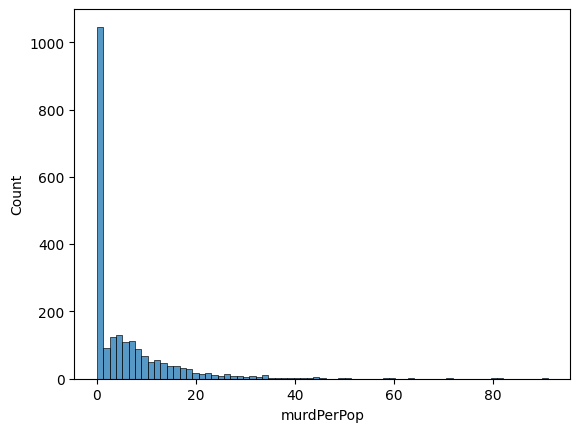

In [87]:
# Identify outliers 

# first Visual inspection using a histogram
sns.histplot(crime_df['murdPerPop'])
plt.show()

In [91]:
# Statistical method: Z-score to identify outlier
z_scores = (crime_df['murdPerPop'] - crime_df['murdPerPop'].mean()) / crime_df['murdPerPop'].std()
outliers = crime_df['murdPerPop'][z_scores > 4]
outliers

11      44.42
164     70.83
175     58.83
348     58.06
661     42.54
705     44.90
720     50.42
783     80.35
830     49.56
851     63.94
988     45.39
1052    91.09
1297    44.69
1300    45.09
1316    58.12
1392    50.99
1449    60.06
1581    81.95
1593    43.76
1605    50.21
1730    59.51
Name: murdPerPop, dtype: float64

4. **1 paragraph of the ethical implications of data wrangling specific to your datasource and the steps you completed answering the following questions:**

    ##### Ethical Implications of Data Wrangling Crime Datasets
    
    Data wrangling crime datasets raises ethical concerns due to the potential for misuse or misinterpretation of the data. Issues such as privacy breaches, bias perpetuation, and discriminatory outcomes can arise. For instance, if crime data is not cleaned or processed correctly, it could lead to biased algorithms that disproportionately target certain communities. Additionally, the way the data is collected and analyzed can influence public perception and policy decisions, potentially exacerbating existing social inequalities. Therefore, it is crucial to approach data wrangling of crime datasets with utmost care and consideration for ethical implications.


    * **What changes were made to the data?**
      - These are some of the changes made to the dataset: feature reduction, identify outliers, handling missing values, aggregating and subsetting the dataset.   
    * **Are there any legal or regulatory guidelines for your data or project topic?**
      - This goes witht the ethical implication I mentioned above, project like this which can influence public perception and policy decisions should be completed in full compliance with applicable laws and regulations.
    * **What risks could be created based on the transformations done?**
      - In the crime dataset, there were several missing values. I tried to handle this using forward fill method. This might reduce the variability in the dataset, as it repeats the same value for consecutive missing entries. This can also lead to a loss of important information and may affect the results of statistical analyses.
        
    * **Did you make any assumptions in cleaning/transforming the data?**
      - Yes. When I was calculating/identifying outlier in the first dataset, I didn't treat the outlier in the assumption some of the high mean daily temperature are real given the climate change situation. 
    * **How was your data sourced / verified for credibility?**
      - The dataset I used was sourced from Kaggle, a popular online platform for sharing public datasets. Kaggle datasets often undergo community review and moderation, which can help to ensure their quality and credibility. However, it's important to note that while Kaggle provides a certain level of quality control, it's still essential to critically evaluate the dataset before using it in any analysis. 
    * **Was your data acquired in an ethical way?**
      - While I don't have specific information about the data collection process for this dataset, I can assure you that ethical data acquisition is a critical concern in any research project. I believe it's essential to ensure that data is collected in a way that respects individual privacy, avoids bias, and adheres to relevant legal and ethical standards. 
    * **How would you mitigate any of the ethical implications you have identified?**
      - The only thing I can mention here, during model selection, training and testing phase of the data analysis, I need to make sure to use algorithms that are designed to be fair and unbiased, avoiding discrimination based on factors like race, gender, or socioeconomic status.



# Project: Milestone 3

*  Student Name: Abraham Abate
*  Instructor: Catherine Williams
*  DSC540: Data Preparation
*  Data Science Dept., BU
*  Date: 10/19/2024

### Instruction:

#### Cleaning/Formatting Website Data
Perform at least 5 data transformation and/or cleansing steps to your website data. The below examples are not required - they are just potential transformations you could do. 

Examples:
* Replace Headers
* Format data into a more readable format
* Identify outliers and bad data
* Find duplicates
* Fix casing or inconsistent values
* Conduct Fuzzy Matching

In [1]:
# Import the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser

# Set up the Chrome WebDriver with ChromeDriverManager
service = Service(ChromeDriverManager().install())

# Initialize the browser 
browser = Browser('chrome', service=service, headless=False)

# Fetch the page content
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'
browser.visit(url)
html = browser.html

In [2]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [3]:
# Check the file 
type(soup)

bs4.BeautifulSoup

In [4]:
# Locate the crime rate table 
tables = soup.find_all('table', {'class': 'wikitable'})

# Check how many tables are present and print their content 
print(f"Number of tables found: {len(tables)}")

Number of tables found: 1


In [5]:
# Retrive the first table contains the crime rate data
crime_rate_table = tables[0]  

In [6]:
# Extract the table headers
headers = [header.get_text(strip=True) for header in crime_rate_table.find_all('th')]

In [7]:
# Extract the rows of the table
rows = crime_rate_table.find_all('tr')

In [8]:
# Extract the Data from Each Row and Handle Missing Data
data = []
for row in rows[1:]:  # Skipping the header row
    cells = row.find_all('td')
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # ensure all rows have the correct number of columns.
    if len(row_data) < len(headers):

        # Fill missing cells with empty strings
        row_data += [''] * (len(headers) - len(row_data))  
    data.append(row_data)

In [10]:
# Convert the data into a DataFrame
crime_df = pd.DataFrame(data, columns=headers)

# Display the DataFrame
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder andNonnegligentmanslaughter,Rape1,Robbery,Aggravatedassault,Total,Burglary,Larcenytheft,Motorvehicletheft,Total
0,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,
2,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83",,,
3,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82",,,
4,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,,314.41,"1,866.01",149.18,"2,329.61",,,


In [11]:
# Check the dataframe shape
crime_df.shape

(102, 17)

In [12]:
# Checking for Empty Strings or Specific Values
crime_df = crime_df[(crime_df != '') & (crime_df != 'NA')]
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder andNonnegligentmanslaughter,Rape1,Robbery,Aggravatedassault,Total,Burglary,Larcenytheft,Motorvehicletheft,Total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83",NaN,NaN,NaN
3,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82",NaN,NaN,NaN
4,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,NaN,314.41,"1,866.01",149.18,"2,329.61",NaN,NaN,NaN


**1. Treat if there is any missing number or data point**

In [14]:
# Drops rows with any missing values
crime_df.dropna(how='all', inplace=True)
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder andNonnegligentmanslaughter,Rape1,Robbery,Aggravatedassault,Total,Burglary,Larcenytheft,Motorvehicletheft,Total
2,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83",NaN,NaN,NaN
3,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82",NaN,NaN,NaN
4,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,NaN,314.41,"1,866.01",149.18,"2,329.61",NaN,NaN,NaN
5,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,12.39,192.49,"1,137.59",55.76,"1,385.85",NaN,NaN,NaN
6,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,19.26,637.45,"3,426.36",466.56,"4,530.37",NaN,NaN,NaN


**2. Format data--Rest the index numbers**

In [15]:
# Rest the index and drop the old index number
crime_df = crime_df.reset_index(drop=True)

In [16]:
# Check the data shape and print the columns
print(crime_df.shape)
crime_df.columns

(100, 17)


Index(['State', 'City', 'Popul.', 'Yearly Crime Rates per 100,000 people',
       'Total', 'Violent crime', 'Arson²', 'Property crime',
       'Murder andNonnegligentmanslaughter', 'Rape1', 'Robbery',
       'Aggravatedassault', 'Total', 'Burglary', 'Larcenytheft',
       'Motorvehicletheft', 'Total'],
      dtype='object')

**3. Replace or rename headers**

In [17]:
# Rename some of the column names
crime_df = crime_df.rename(columns={'Murder andNonnegligentmanslaughter': 'Murder', 'Aggravatedassault': 'Aggravated Assault', 'Motorvehicletheft': 'Auto Theft'})
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder,Rape1,Robbery,Aggravated Assault,Total,Burglary,Larcenytheft,Auto Theft,Total
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83",NaN,NaN,NaN
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82",NaN,NaN,NaN
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,NaN,314.41,"1,866.01",149.18,"2,329.61",NaN,NaN,NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,12.39,192.49,"1,137.59",55.76,"1,385.85",NaN,NaN,NaN
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,19.26,637.45,"3,426.36",466.56,"4,530.37",NaN,NaN,NaN


**1.1. Drop further any other remaining missing values**

In [18]:
# Handle the missing value using bfill method
pd.set_option('future.no_silent_downcasting', True)
crime_df = crime_df.bfill()
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder,Rape1,Robbery,Aggravated Assault,Total,Burglary,Larcenytheft,Auto Theft,Total
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83",NaN,NaN,NaN
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82",NaN,NaN,NaN
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,12.39,314.41,"1,866.01",149.18,"2,329.61",NaN,NaN,NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,12.39,192.49,"1,137.59",55.76,"1,385.85",NaN,NaN,NaN
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,19.26,637.45,"3,426.36",466.56,"4,530.37",NaN,NaN,NaN


**1.2. Treat missing values further by dropping columns with too many missing values**

In [19]:
# Drop columns with too many missing values 
crime_df.dropna(thresh=int(0.5 * crime_df.shape[0]), axis=1, inplace=True)
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder,Rape1,Robbery,Aggravated Assault,Total,Burglary
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83"
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82"
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,12.39,314.41,"1,866.01",149.18,"2,329.61"
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,12.39,192.49,"1,137.59",55.76,"1,385.85"
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,19.26,637.45,"3,426.36",466.56,"4,530.37"


In [20]:
# Check for duplicated rows
duplicate_rows = crime_df[crime_df.duplicated()]
print("Duplicated rows:\n", duplicate_rows)

Duplicated rows:
 Empty DataFrame
Columns: [State, City, Popul., Yearly Crime Rates per 100,000 people, Total, Violent crime, Arson², Property crime, Murder, Rape1, Robbery, Aggravated Assault, Total, Burglary]
Index: []


In [21]:
# Find unique values from columns
print(crime_df['City'].unique())
print(crime_df['State'].unique())

['Mobile3' 'Anchorage' 'Chandler' 'Gilbert' 'Glendale' 'Mesa' 'Phoenix'
 'Scottsdale' 'Tucson' 'Anaheim' 'Bakersfield' 'Chula Vista' 'Fremont'
 'Fresno' 'Irvine' 'Long Beach' 'Los Angeles' 'Oakland' 'Riverside'
 'Sacramento' 'San Bernardino' 'San Diego' 'San Francisco' 'San Jose'
 'Santa Ana' 'Santa Clarita' 'Stockton4' 'Aurora' 'Colorado Springs'
 'Denver' 'Washington, D.C.' 'Hialeah' 'Jacksonville' 'Miami' 'Orlando'
 'St. Petersburg' 'Tampa' 'Atlanta' 'Savannah' 'Honolulu' 'Boise'
 'Chicago' 'Fort Wayne' 'Indianapolis' 'Des Moines' 'Wichita' 'Lexington'
 'Louisville Metro6' 'Baton Rouge' 'New Orleans' 'Baltimore' 'Boston'
 'Detroit' 'Minneapolis' 'St. Paul' 'Kansas City' 'St. Louis' 'Omaha'
 'Henderson' 'Las Vegas' 'Paradise' 'Reno' 'Jersey City' 'Newark'
 'Albuquerque' 'Buffalo' 'New York' 'Charlotte-Mecklenburg' 'Raleigh'
 'Greensboro' 'Cincinnati' 'Cleveland' 'Columbus' 'Toledo4,5,7'
 'Oklahoma City' 'Tulsa' 'Portland' 'Philadelphia' 'Pittsburgh' 'Memphis'
 'Nashville' 'Arlington4

In [22]:
import re

# Define a function to remove digits from a string
def remove_numbers(city_name):
    return re.sub(r'\d+', '', city_name).strip()

# Apply the function to the 'City' column
crime_df['City'] = crime_df['City'].apply(remove_numbers)

In [23]:
crime_df.head()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder,Rape1,Robbery,Aggravated Assault,Total,Burglary
0,Alabama,Mobile,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,22.94,"1,216.84","3,730.21",506.78,"5,453.83"
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",20.93,748.17,"3,619.66","1,047.98","5,415.82"
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.68,259.47,12.39,314.41,"1,866.01",149.18,"2,329.61"
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,12.39,192.49,"1,137.59",55.76,"1,385.85"
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,19.26,637.45,"3,426.36",466.56,"4,530.37"


In [24]:
# Save the cleaned DataFrame as a CSV file
crime_df.to_csv('city_crime_df.csv', index=False)

In [45]:
# Get summary statistics
crime_df.describe()

,State,City,Popul.,"Yearly Crime Rates per 100,000 people",Total,Violent crime,Arson²,Property crime,Murder,Rape1,Robbery,Aggravated Assault,Total,Burglary
count,100,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,36,100,100,100,94,97,100,100,97,92,100,100,100,100
top,California,Mobile,"248,431",6217.02,8.35,97.62,177.11,485.85,947.12,74.95,"1,216.84","3,730.21",506.78,"5,453.83"
freq,18,1,1,1,2,4,1,1,4,2,1,1,1,1


In [46]:
# Get column names
print(crime_df.columns)

Index(['State', 'City', 'Popul.', 'Yearly Crime Rates per 100,000 people',
       'Total', 'Violent crime', 'Arson²', 'Property crime', 'Murder', 'Rape1',
       'Robbery', 'Aggravated Assault', 'Total', 'Burglary'],
      dtype='object')


In [47]:
# Rename the duplicate 'Total' column
crime_df = crime_df.rename(columns={'Total': 'Total Crime'}, errors='raise')

# Rename the second 'Total' column by its position
# List of columns to convert to numeric value
crime_df.columns = ['State', 'City', 'Popul.', 'Yearly Crime Rates per 100,000 people',
              'Total Crime', 'Violent crime', 'Arson²', 'Property crime', 'Murder', 
              'Rape1', 'Robbery', 'Aggravated Assault', 'Total Crime 2', 'Burglary']

# Apply pd.to_numeric() to those columns
crime_df[columns_to_convert] = crime_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

**4. Identify bad data: datapoint which doesn't make sense including them**

In [48]:
# Check for negative values where the value doesn't make sense 
bad_data = crime_df[(crime_df['Popul.'] <= 0) | (crime_df['Violent crime'] < 0)]
print("Rows with logically incorrect data:\n", bad_data)

Rows with logically incorrect data:
 Empty DataFrame
Columns: [State, City, Popul., Yearly Crime Rates per 100,000 people, Total Crime, Violent crime, Arson², Property crime, Murder, Rape1, Robbery, Aggravated Assault, Total Crime 2, Burglary]
Index: []


**5. Identify outliers**

In [49]:
from scipy import stats

# Identify outliers using Z-score
numerical_cols = crime_df.select_dtypes(include=['float64', 'int64'])
z_scores = stats.zscore(numerical_cols)
outliers = (z_scores > 3) | (z_scores < -3)
print("Rows with potential outliers:\n", crime_df[outliers.any(axis=1)])

Rows with potential outliers:
             State       City  Popul.  Yearly Crime Rates per 100,000 people  \
50       Maryland  Baltimore     NaN                                6997.68   
51  Massachusetts     Boston     NaN                                2758.22   
52       Michigan    Detroit     NaN                                6726.82   
56       Missouri  St. Louis     NaN                                8188.31   

    Total Crime  Violent crime  Arson²  Property crime  Murder   Rape1  \
50        55.77          62.29  958.71          950.23     NaN   42.56   
51         8.35          42.47  205.59          412.80   669.2  129.55   
52        39.80         103.91  393.42             NaN     NaN  129.55   
56        66.07          93.14  626.52             NaN     NaN   64.78   

    Robbery  Aggravated Assault Total Crime 2  Burglary  
50      NaN                 NaN        843.26       NaN  
51   308.83                 NaN        176.45       NaN  
52      NaN                 

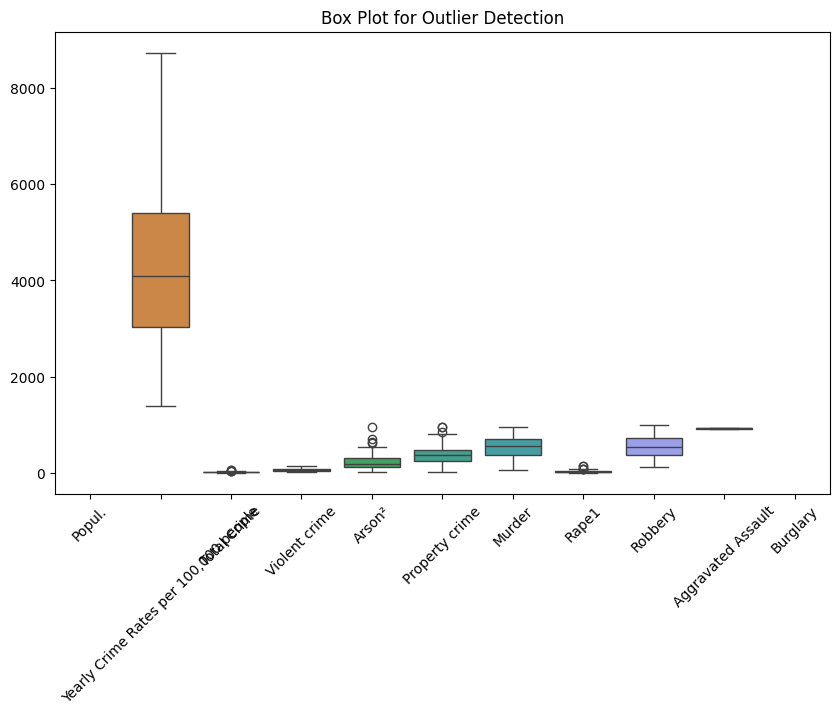

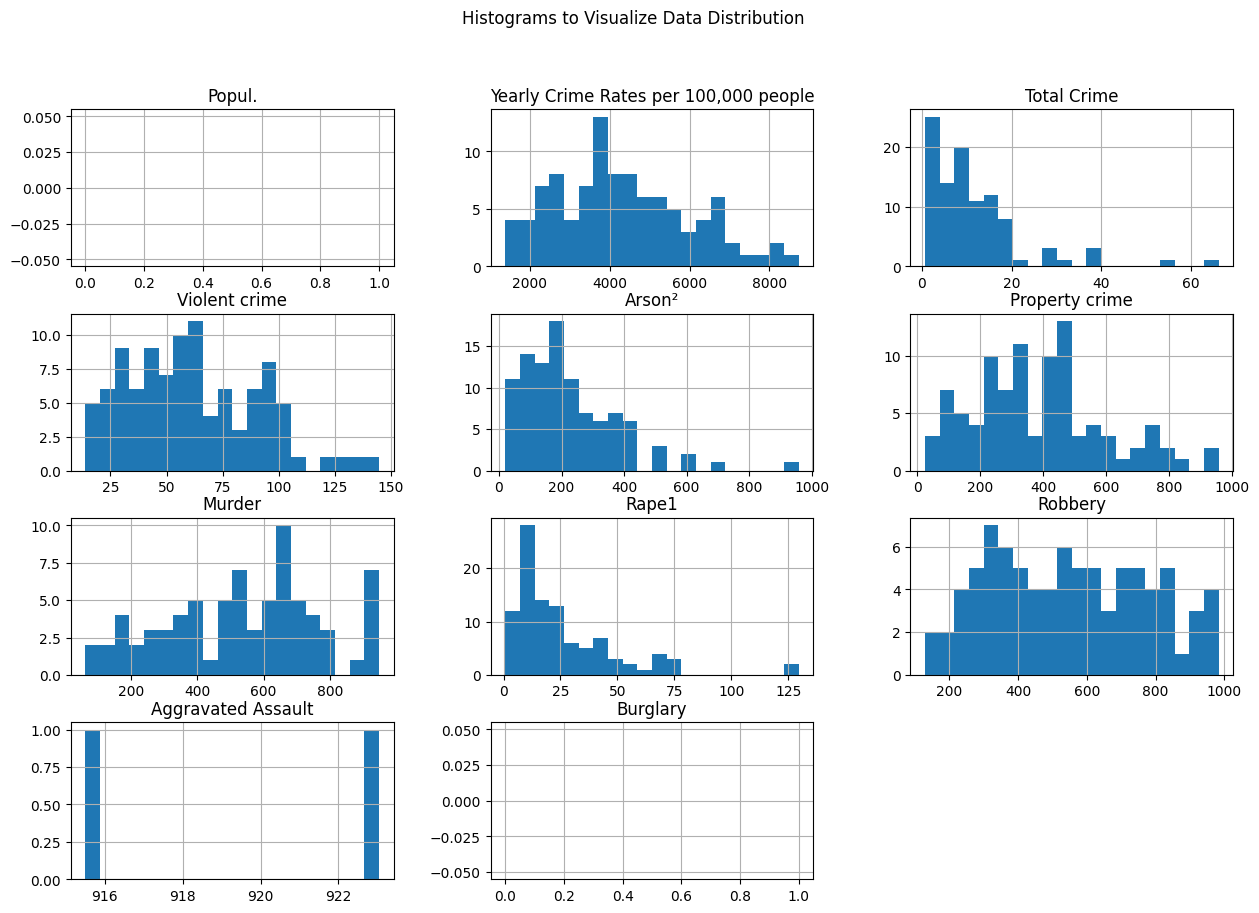

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a box plot to visually inspect for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_cols)
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection")
plt.show()

# Plot histograms to visualize distributions
crime_df[numerical_cols.columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms to Visualize Data Distribution")
plt.show()

In [25]:
browser.quit()

# Project: Milestone 4

*  Student Name: Abraham Abate
*  Instructor: Catherine Williams
*  DSC540: Data Preparation
*  Data Science Dept., BU
*  Date: 11/02/2024

### Instruction:

#### Connecting to an API/Pulling in the Data and Cleaning/Formatting

Perform at least 5 data transformation and/or cleansing steps to your API data. The below examples are not required - they are just potential transformations you could do. If your data doesn't work for these scenarios, complete different transformations. You can do the same transformation multiple times if needed to clean your data. The goal is a clean dataset at the end of the milestone. As a reminder - you cannot export your API data to CSV to work with it, you must do all the work directly against the API/JSON source.
Perform at least 5 data transformation and/or cleansing steps to your website data. The below examples are not required - they are just potential transformations you could do. 

Examples:
* Replace Headers
* Format data into a more readable format
* Identify outliers and bad data
* Find duplicates
* Fix casing or inconsistent values
* Conduct Fuzzy Matching

In [28]:
# import necessary libraries
import requests
import json
#import config
from requests import HTTPError, RequestException
import datetime

In [40]:
# Open the API key file
with open("weather_api_key.json", "r") as file:
    data = json.load(file)
    weather_api = data["api_key"]

In [41]:
# prompt user to input a city name and zip code
city_name = input("Enter the city name: ")

# Build query URL
query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={API_key}&units=metric"

Enter the city name:  Dallas


In [42]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -96.7836, 'lat': 32.7668}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.79, 'feels_like': 23.42, 'temp_min': 21.7, 'temp_max': 23.52, 'pressure': 1017, 'humidity': 88, 'sea_level': 1017, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 140}, 'clouds': {'all': 100}, 'dt': 1730571292, 'sys': {'type': 2, 'id': 2075302, 'country': 'US', 'sunrise': 1730551568, 'sunset': 1730590510}, 'timezone': -18000, 'id': 4684904, 'name': 'Dallas', 'cod': 200}.


In [43]:
# Pretty-print the JSON data with indentation for easier reading
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -96.7836,
        "lat": 32.7668
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 22.79,
        "feels_like": 23.42,
        "temp_min": 21.7,
        "temp_max": 23.52,
        "pressure": 1017,
        "humidity": 88,
        "sea_level": 1017,
        "grnd_level": 998
    },
    "visibility": 10000,
    "wind": {
        "speed": 4.63,
        "deg": 140
    },
    "clouds": {
        "all": 100
    },
    "dt": 1730571292,
    "sys": {
        "type": 2,
        "id": 2075302,
        "country": "US",
        "sunrise": 1730551568,
        "sunset": 1730590510
    },
    "timezone": -18000,
    "id": 4684904,
    "name": "Dallas",
    "cod": 200
}


In [44]:
# Step-1: Convert temperature from Celsius to Fahrenheit
weather_json['main']['temp_F'] = weather_json['main']['temp'] * 9/5 + 32
weather_json['main']['temp_max_F'] = weather_json['main']['temp_max'] * 9/5 + 32
weather_json['main']['temp_min_F'] = weather_json['main']['temp_min'] * 9/5 + 32

In [45]:
# Step-2: Convert Unix timestamp to readable date and time
weather_json['dt_readable'] = datetime.datetime.fromtimestamp(weather_json['dt']).strftime('%Y-%m-%d %H:%M:%S')
weather_json['sunrise_readable'] = datetime.datetime.fromtimestamp(weather_json['sys']['sunrise']).strftime('%Y-%m-%d %H:%M:%S')
weather_json['sunset_readable'] = datetime.datetime.fromtimestamp(weather_json['sys']['sunset']).strftime('%Y-%m-%d %H:%M:%S')

In [46]:
# Step-3: Rename keys for clarity
weather_json['main']['ground_level'] = weather_json['main'].pop('grnd_level')
weather_json['main']['temperature_C'] = weather_json['main'].pop('temp')
weather_json['main']['temperature_max_C'] = weather_json['main'].pop('temp_max')
weather_json['main']['temperature_min_C'] = weather_json['main'].pop('temp_min')
weather_json['main']['humidity_percentage'] = weather_json['main'].pop('humidity')

In [47]:
# Step-4:Convert wind speed from m/s to km/h
weather_json['wind']['speed_kmh'] = weather_json['wind']['speed'] * 3.6

In [48]:
# Step-5:Remove unnecessary keys to simplify the data
keys_to_remove = ['visibility', 'clouds', 'cod', 'id', 'timezone', 'base']
for key in keys_to_remove:
    weather_json.pop(key, None)

In [49]:
# Pretty-print the JSON data with indentation for easier reading
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": -96.7836,
        "lat": 32.7668
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "main": {
        "feels_like": 23.42,
        "pressure": 1017,
        "sea_level": 1017,
        "temp_F": 73.02199999999999,
        "temp_max_F": 74.336,
        "temp_min_F": 71.06,
        "ground_level": 998,
        "temperature_C": 22.79,
        "temperature_max_C": 23.52,
        "temperature_min_C": 21.7,
        "humidity_percentage": 88
    },
    "wind": {
        "speed": 4.63,
        "deg": 140,
        "speed_kmh": 16.668
    },
    "dt": 1730571292,
    "sys": {
        "type": 2,
        "id": 2075302,
        "country": "US",
        "sunrise": 1730551568,
        "sunset": 1730590510
    },
    "name": "Dallas",
    "dt_readable": "2024-11-02 13:14:52",
    "sunrise_readable": "2024-11-02 07:46:08",
    "sunset_readable":

1. **Write a paragraph highlighting the ethical implications of data wrangling specific to your datasource and the steps you completed answering the following questions:**

    ##### Ethical Implications of Data Wrangling Crime Datasets
    
    I couldn't identify any ethical implications related to data wrangling of weather datasets, such as the OpenWeather JSON.

    * **What changes were made to the data?**
      - Here are some of the changes made on the JSON file: temperature converted from Celsius to Fahrenheit, timestamp also converted to readable date and time, some of the keys are renamed for clarity, wind speed converted from m/s to km/h and finally unnecessary keys are removed to simplify the data. 
    * **Are there any legal or regulatory guidelines for your data or project topic?**
      - I addressed this in the previous milestone. This relates to the ethical implications, as there is a potential for misuse or misinterpretation of the data. Projects like this, which can influence public perception and policy decisions, should be conducted in full compliance with relevant laws and regulations.
        
    * **What risks could be created based on the transformations done?**
      - NA.      
    * **Did you make any assumptions in cleaning/transforming the data?**
      - Yes. These a couple of assumptions made during the transformation steps. First, temperature Unit Preference: I assumed the preferred temperature unit (e.g., Fahrenheit or Celsius) based on the needs of the intended audience or application. And theother assumption, timestamp Format: I assumed that all timestamps are in UTC or a specific timezone and converting them to a readable local date and time if necessary. 
    * **How was your data sourced / verified for credibility?**
      - The dataset I used was sourced from OpenWeather, a widely used provider of weather information. OpenWeather gathers its data from a blend of global and local weather models, satellites, radars, and a vast network of over 82,000 weather stations worldwide.
         
    * **Was your data acquired in an ethical way?**
      - This ties back to the previous point: OpenWeather is a reliable source of weather information for the reasons outlined above.
    * **How would you mitigate any of the ethical implications you have identified?**
      - No ethical issue noted in this particular analysis.



# Project: Milestone 5

*  Student Name: Abraham Abate
*  Instructor: Catherine Williams
*  DSC540: Data Preparation
*  Data Science Dept., BU
*  Date: 11/16/2024

### Merging the Data and Storing in a Database/Visualizing Data
Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together with SQL joins into 1 dataset.
Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source, using SQL joins (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).
For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.
PowerBI is a free tool that could be used – Tableau only has a free web author. If you use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.
Clearly label each visualization. Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project In your write-up, make sure to address the ethical implications of cleansing data and your project topic. You can submit a Jupyter Notebook or a PDF of your code. If you submit a .py file you need to also include a PDF or attachment of your results.
You must submit the following:
* Jupyter Notebook File or PDF of your code with Milestone # listed.
* Each step and visualization should be clearly labeled.Human readable dataset after all transformations should be printed at the end of your notebook.
* 250-500 word summary of what you learned and a summary of the ethical implications answering the following questions:
    * What changes were made to the data?
    * Are there any legal or regulatory guidelines for your data or project topic?
    * What risks could be created based on the transformations done?
    * Did you make any assumptions in cleaning/transforming the data?
    * How was your data sourced / verified for credibility?
    * Was your data acquired in an ethical way?
    * How would you mitigate any of the ethical implications you have identified?

First, create an SQLite database and define tables for each of your datasets using `sqlite3`.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandas as pd

In [14]:
# Create a connection to the SQLite database
conn = sqlite3.connect('vacation_spot.db')
cursor = conn.cursor()

# Load the SV files into pandas 
weather_df = pd.read_csv('weather_data.csv')  
crime_df = pd.read_csv('crime_data.csv')      
city_crime_df = pd.read_csv('city_crime_df.csv')  

# Create tables for each dataset 
weather_df.to_sql('Weather', conn, if_exists='replace', index=False)
crime_df.to_sql('Crime', conn, if_exists='replace', index=False)
city_crime_df.to_sql('City_crime', conn, if_exists='replace', index=False)

100

Verify that the tables are created successfully and that the datasets are correctly loaded.

In [15]:
# Inspect the first few rows of the tables 
cursor.execute("SELECT * FROM Weather LIMIT 5;")
print(cursor.fetchall())

cursor.execute("SELECT * FROM Crime LIMIT 5;")
print(cursor.fetchall())

cursor.execute("SELECT * FROM City_crime LIMIT 5;")
print(cursor.fetchall())

[('Alabama', 69.45907101593045, 60.17014646670946, 81.38799089688978, 60.39619536675031, 1017.2336289899048, 485.6707825173601, 9.375620003501195, 3.89289257162864, 10.302345801482172, 19.807527571920406, 0.1477983310964579, 0.0588784501371301, 0.2477679873956935, 0.0005835327070082, 0.0, 0.0996673863570053, 0.0, 69.43933593977943, 69.39131469918888, 69.0848789169633, 68.92722413491276, 81.3946801268211, 81.37095174184513, 81.07215556981969, 80.83018225671549, 60.136974577425065, 60.0828137947132, 59.81650638968314, 59.710035984516935, 60.24735367917372, 60.059122366808666, 59.52455038804925, 59.19466806714516), ('Alaska', 44.66599755629255, 36.93150637109444, 52.93621923546866, 36.485477395706056, 1011.7755629254668, 402.9399197067551, 9.016948856694013, 5.825676383312969, 12.223110490486995, 22.0899633443882, 0.0682492581602373, 0.0881480188514575, 0.3426426950602199, 0.0848315587362541, 0.0005236515971373, 0.0064583696980275, 0.0, 44.7298830511433, 44.8079385582126, 44.8550480013964

Join the tables based on a common column- `State`

In [16]:
# Create a cursor object
cursor = conn.cursor()

# Run the PRAGMA query to get the table info for City_crime
cursor.execute("PRAGMA table_info(City_crime);")

# Fetch the result
columns_info = cursor.fetchall()

# Print the column information
for column in columns_info:
    print(column)


(0, 'State', 'TEXT', 0, None, 0)
(1, 'City', 'TEXT', 0, None, 0)
(2, 'Popul.', 'TEXT', 0, None, 0)
(3, 'Yearly Crime Rates per 100,000 people', 'REAL', 0, None, 0)
(4, 'Total', 'REAL', 0, None, 0)
(5, 'Violent crime', 'REAL', 0, None, 0)
(6, 'Arson²', 'REAL', 0, None, 0)
(7, 'Property crime', 'TEXT', 0, None, 0)
(8, 'Murder', 'TEXT', 0, None, 0)
(9, 'Rape1', 'REAL', 0, None, 0)
(10, 'Robbery', 'TEXT', 0, None, 0)
(11, 'Aggravated Assault', 'TEXT', 0, None, 0)
(12, 'Total.1', 'TEXT', 0, None, 0)
(13, 'Burglary', 'TEXT', 0, None, 0)


In [17]:
# Create a cursor object
cursor = conn.cursor()

# Run the PRAGMA query to get the table info for Weather
cursor.execute("PRAGMA table_info(Weather);")

# Fetch the result
columns_info = cursor.fetchall()

# Print the column information
for column in columns_info:
    print(column)

(0, 'State', 'TEXT', 0, None, 0)
(1, 'mean_temp', 'REAL', 0, None, 0)
(2, 'min_temp', 'REAL', 0, None, 0)
(3, 'max_temp', 'REAL', 0, None, 0)
(4, 'dewpoint', 'REAL', 0, None, 0)
(5, 'sea_level_pressure', 'REAL', 0, None, 0)
(6, 'station_pressure', 'REAL', 0, None, 0)
(7, 'visibility', 'REAL', 0, None, 0)
(8, 'wind_speed', 'REAL', 0, None, 0)
(9, 'max_wind_speed', 'REAL', 0, None, 0)
(10, 'wind_gust', 'REAL', 0, None, 0)
(11, 'precipitation', 'REAL', 0, None, 0)
(12, 'fog', 'REAL', 0, None, 0)
(13, 'rain', 'REAL', 0, None, 0)
(14, 'snow', 'REAL', 0, None, 0)
(15, 'hail', 'REAL', 0, None, 0)
(16, 'thunder', 'REAL', 0, None, 0)
(17, 'tornado', 'REAL', 0, None, 0)
(18, 'mean_temp_3d_avg', 'REAL', 0, None, 0)
(19, 'mean_temp_5d_avg', 'REAL', 0, None, 0)
(20, 'mean_temp_10d_avg', 'REAL', 0, None, 0)
(21, 'mean_temp_15d_avg', 'REAL', 0, None, 0)
(22, 'max_temp_3d_avg', 'REAL', 0, None, 0)
(23, 'max_temp_5d_avg', 'REAL', 0, None, 0)
(24, 'max_temp_10d_avg', 'REAL', 0, None, 0)
(25, 'max_temp_1

In [18]:
# Create a cursor object
cursor = conn.cursor()

# Run the PRAGMA query to get the table info for Crime dataset
cursor.execute("PRAGMA table_info(Crime);")

# Fetch the result
columns_info = cursor.fetchall()

# Print the column information
for column in columns_info:
    print(column)

(0, 'State', 'TEXT', 0, None, 0)
(1, 'murdPerPop', 'REAL', 0, None, 0)
(2, 'rapesPerPop', 'REAL', 0, None, 0)
(3, 'robbbPerPop', 'REAL', 0, None, 0)
(4, 'assaultPerPop', 'REAL', 0, None, 0)
(5, 'burglPerPop', 'REAL', 0, None, 0)
(6, 'larcPerPop', 'REAL', 0, None, 0)
(7, 'autoTheftPerPop', 'REAL', 0, None, 0)
(8, 'arsonsPerPop', 'REAL', 0, None, 0)
(9, 'ViolentCrimesPerPop', 'REAL', 0, None, 0)


In [19]:
# Create the query
query = '''
SELECT 
    weather.State AS State,
    weather.mean_temp,
    weather.min_temp,
    weather.max_temp,
    weather.dewpoint,
    weather.sea_level_pressure,
    weather.visibility,
    crime.murdPerPop,
    crime.rapesPerPop,
    crime.robbbPerPop,
    crime.burglPerPop,
    crime.larcPerPop,
    crime.autoTheftPerPop,
    crime.arsonsPerPop,
    crime.ViolentCrimesPerPop,
    city_crime.City,
    city_crime.`Popul.`,
    city_crime.'Yearly Crime Rates per 100,000 people',
    city_crime.'Total.1',
    city_crime.'Violent crime',
    city_crime.'Property crime',
    city_crime.Murder,
    city_crime.Robbery,
    city_crime.'Aggravated Assault',
    city_crime.Burglary
FROM 
    Weather AS weather
JOIN 
    Crime AS crime ON weather.State = crime.State
JOIN 
    City_crime AS city_crime ON weather.State = city_crime.State;

'''

# Execute the query and load the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# View the combined data
result_df.columns

Index(['State', 'mean_temp', 'min_temp', 'max_temp', 'dewpoint',
       'sea_level_pressure', 'visibility', 'murdPerPop', 'rapesPerPop',
       'robbbPerPop', 'burglPerPop', 'larcPerPop', 'autoTheftPerPop',
       'arsonsPerPop', 'ViolentCrimesPerPop', 'City', 'Popul.',
       'Yearly Crime Rates per 100,000 people', 'Total.1', 'Violent crime',
       'Property crime', 'Murder', 'Robbery', 'Aggravated Assault',
       'Burglary'],
      dtype='object')

In [20]:
# Ensure Popul. is treated as a string
result_df["Popul."] = result_df["Popul."].astype(str)

# Remove commas from the 'Popul.' column and convert to integer
result_df["Popul."] = result_df["Popul."].str.replace(',', '').astype(int)

# Perform aggregation 
combined_data = result_df.groupby(["State", "City"]).agg({
    "mean_temp": "mean",
    "min_temp": "mean",
    "max_temp": "mean",
    "dewpoint": "mean",
    "murdPerPop": "mean", 
    "robbbPerPop": "mean", 
    "Violent crime": "mean", 
    "Popul.": "mean"  
}).reset_index()

# View the result
combined_data.head()


,State,City,mean_temp,min_temp,max_temp,dewpoint,murdPerPop,robbbPerPop,Violent crime,Popul.
0,Alabama,Mobile,69.459071,60.170146,81.387991,60.396195,11.342093,199.333721,58.16,248431.0
1,Alaska,Anchorage,44.665998,36.931506,52.936219,36.485477,8.870000,156.103333,132.01,296188.0
2,Arizona,Chandler,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,52.13,249355.0
3,Arizona,Gilbert,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,16.11,242090.0
4,Arizona,Glendale,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,38.91,249273.0


In [21]:
# Move 'City' from Second position to first position
cols = combined_data.columns.tolist()
# Remove the column from its current position
cols.remove('City')  
cols.insert(0, 'City')
# Reorder the DataFrame
combined_data = combined_data[cols]  

# Rename column
combined_data = combined_data.rename(columns={'Popul.': 'Population'})

combined_data.head()

,City,State,mean_temp,min_temp,max_temp,dewpoint,murdPerPop,robbbPerPop,Violent crime,Population
0,Mobile,Alabama,69.459071,60.170146,81.387991,60.396195,11.342093,199.333721,58.16,248431.0
1,Anchorage,Alaska,44.665998,36.931506,52.936219,36.485477,8.870000,156.103333,132.01,296188.0
2,Chandler,Arizona,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,52.13,249355.0
3,Gilbert,Arizona,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,16.11,242090.0
4,Glendale,Arizona,72.156869,53.687727,88.361515,32.471263,4.613500,119.256000,38.91,249273.0


In [22]:
# Close the connection to the SQLite database
conn.close()

## Visualizations

#### 1. Violent Crime Rate by State
This bar plot shows the average violent crime rate by state, providing an understanding of how crime rates differ across states.

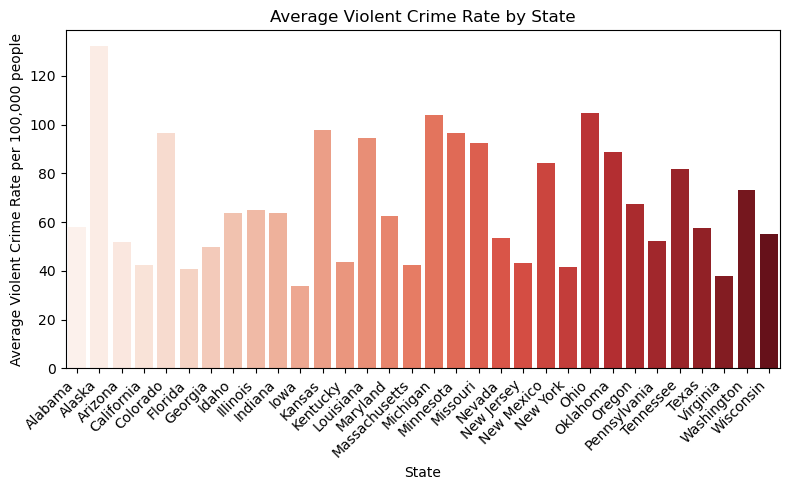

In [30]:
# Calculate the average violent crime rate by state
avg_crime_rate_by_state = combined_data.groupby('State')['Violent crime'].mean().reset_index()

# Bar plot for violent crime rate by state 
plt.figure(figsize=(8, 5))
sns.barplot(x='State', y='Violent crime', data=avg_crime_rate_by_state, hue='State', palette='Reds')
plt.title('Average Violent Crime Rate by State')
plt.xlabel('State')
plt.ylabel('Average Violent Crime Rate per 100,000 people')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### 2. Heat Map:
A heatmap of correlations to provide insight on the relationship between temperature, crime rates, and population.

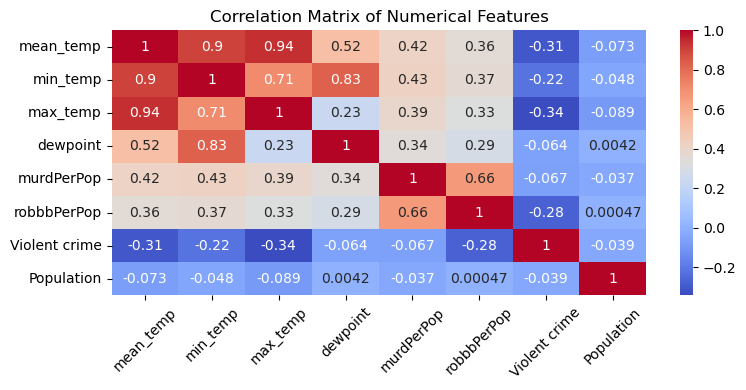

In [51]:
# Compute the correlation matrix
correlation_matrix = combined_data[['mean_temp', 'min_temp', 'max_temp', 'dewpoint', 'murdPerPop', 'robbbPerPop', 'Violent crime', 'Population']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3. Distribution of Mean Temperatures Across States
Bar plot displays the mean temperature for each State, allowing for comparison.

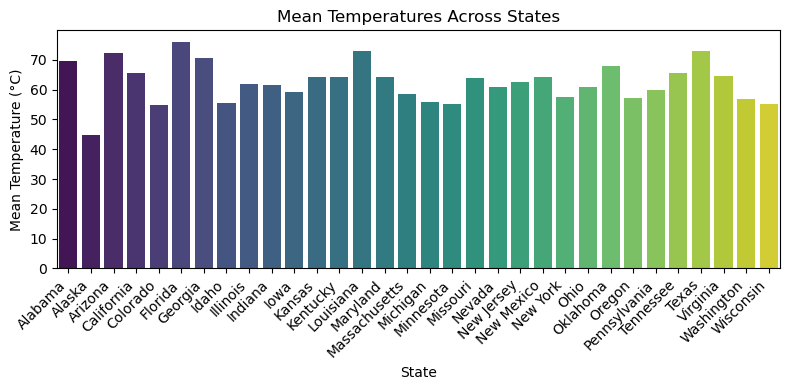

In [52]:
# Bar plot for mean temperatures across States
plt.figure(figsize=(8, 4))
sns.barplot(x='State', y='mean_temp', data=combined_data, hue='State', palette='viridis')
plt.title('Mean Temperatures Across States')
plt.xlabel('State')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#### 4. Pairplot: Exploring Relationships Between variables
A pairplot to examine the relationships between temperature, population and crime.

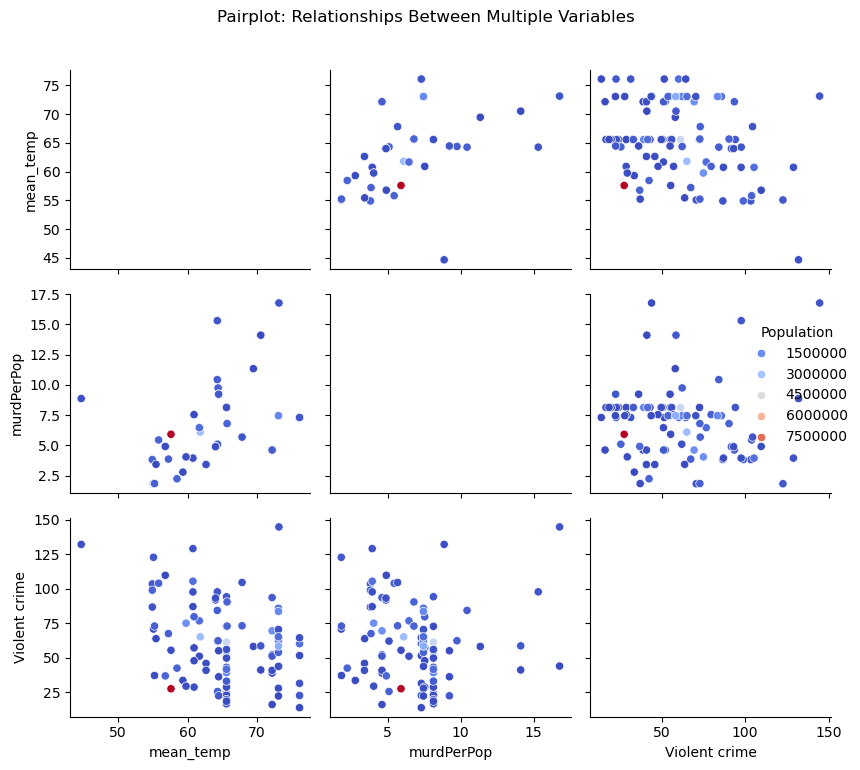

In [38]:
# Select a subset of columns 
subset_data = combined_data[['mean_temp', 'murdPerPop', 'Violent crime', 'Population']]

# Pairplot for relationships between selected variables
sns.pairplot(subset_data, kind='scatter', diag_kind='kde', hue='Population', palette='coolwarm')
plt.suptitle('Pairplot: Relationships Between Multiple Variables', y=1.02)
plt.tight_layout()
plt.show()


#### 5. Average Murder Rate by State
This is to plot the average murder rate by state

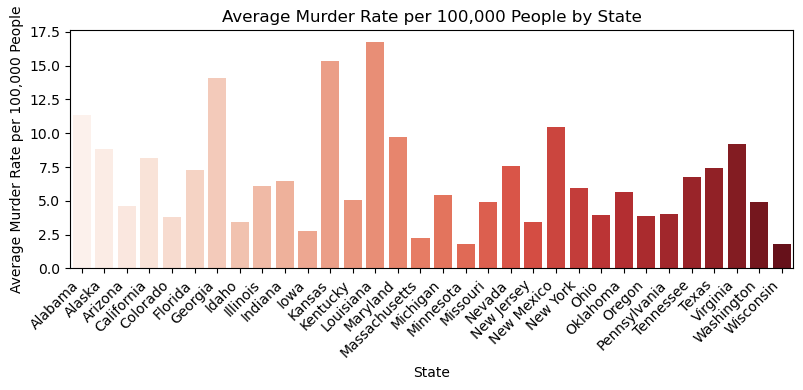

In [47]:
# Calculate the average murder rate by state
avg_murder_rate_by_state = combined_data.groupby('State')['murdPerPop'].mean().reset_index()

# Bar plot for average murder rate by state
plt.figure(figsize=(8, 4))
sns.barplot(x='State', y='murdPerPop', data=avg_murder_rate_by_state, hue='State',palette='Reds')
plt.title('Average Murder Rate per 100,000 People by State')
plt.xlabel('State')
plt.ylabel('Average Murder Rate per 100,000 People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [13]:
# import necessary libraries
import requests
import json
#import config
from requests import HTTPError, RequestException
import datetime

# Prompt user to input a city name
city_name = input("Enter the city name: ")

# Open the API key file
with open("weather_api_key.json", "r") as file:
    data = json.load(file)
    weather_api = data["api_key"]

# Build query URL for weather data
query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api}&units=metric"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Check if the city was found
if weather_json.get('cod') != 200:
    print(f"Error: {weather_json.get('message')}")
else:
    # Extract relevant weather data from the response
    weather_data = {
        'city': weather_json['name'],
        'temperature': weather_json['main']['temp'],
        'humidity': weather_json['main']['humidity'],
        'weather_description': weather_json['weather'][0]['description']
    }

    # Print the weather data
    print(f"Weather in {weather_data['city']}:")
    print(f"Temperature: {weather_data['temperature']}°C")
    print(f"Humidity: {weather_data['humidity']}%")
    print(f"Description: {weather_data['weather_description']}")

    # Add weather data to the combined_data DataFrame
    if city_name in combined_data['City'].values:
        # Create a new DataFrame with weather data for the city
        weather_df = pd.DataFrame([weather_data])

        # Merge the weather data with the existing combined_data df
        combined_data = pd.merge(combined_data, weather_df, how='left', left_on='City', right_on='city')

        # Drop the extra 'city' column from the merged df
        combined_data = combined_data.drop(columns=['city'])

        # Show the merged result
        print("\nCombined data with Crime and weather information:")
        print(combined_data.head())
    else:
        print(f"The city {city_name} was not found in the dataset.")


Enter the city name:  Mobile


Weather in Mobile:
Temperature: 22.35°C
Humidity: 67%
Description: few clouds

Combined data with Crime and weather information:
        City    State  mean_temp   min_temp   max_temp   dewpoint  murdPerPop  \
0     Mobile  Alabama  69.459071  60.170146  81.387991  60.396195   11.342093   
1  Anchorage   Alaska  44.665998  36.931506  52.936219  36.485477    8.870000   
2   Chandler  Arizona  72.156869  53.687727  88.361515  32.471263    4.613500   
3    Gilbert  Arizona  72.156869  53.687727  88.361515  32.471263    4.613500   
4   Glendale  Arizona  72.156869  53.687727  88.361515  32.471263    4.613500   

   robbbPerPop  Violent crime  Population  temperature_x  humidity_x  \
0   199.333721          58.16    248431.0          22.35        67.0   
1   156.103333         132.01    296188.0            NaN         NaN   
2   119.256000          52.13    249355.0            NaN         NaN   
3   119.256000          16.11    242090.0            NaN         NaN   
4   119.256000          

## Summary of Data Analysis 

The analysis of the Vacation Spot Dashboard integrated crime and weather data to help users make informed decisions about choosing vacation destinations. The primary objective was to understand how crime rates and weather conditions impact the desirability of various cities or states as vacation spots. The analysis involved merging crime statistics and weather data, cleaning and transforming the data, and creating visualizations that could provide meaningful insights.

**Data Preparation** included several key changes to the raw data. First, I aggregated crime statistics at the state and city level, as the dataset often contained repeated city entries. This allowed for accurate comparisons of crime data across states and cities. Weather data was obtained from Kaggel and an external API (OpenWeather) and merged with the crime dataset based on matching city and state names. The weather data included critical factors such as temperature, humidity, and weather descriptions, which were linked to crime rates for analysis. I cleaned and standardized columns such as population data to ensure consistency and remove extraneous characters, making the dataset more reliable for analysis. One challenge I faced during data preparation was that one of the weather datasets was very large, causing my computer to crash multiple times. I had to spend a considerable amount of time trying to reduce the dataset size in order to prevent this issue.

**Data Visualizations** were produced to explore trends and correlations. I created heatmap/scatter plots and bar charts to show relationships between crime rates, population size, and weather conditions. For instance, heatmap/scatter plots revealed relationships between temperature, population and crime, while bar charts illustrated state-level trends in crime and weather patterns. These visualizations helped in providing insights into how weather conditions might correlate with crime, as well as highlighting which States were more or less favorable based on crime rates and climate.

### Ethical Implications and Considerations

#### Changes Made to the Data
The changes to the data were mostly focused on cleaning and aggregating it for consistency. Transformed the dataset by grouping State-level data and calculating averages to produce state-level statistics. In addition, weather data from the OpenWeather API was merged into the crime dataset to provide context about each city's climate conditions.

#### Legal or Regulatory Guidelines
The project involved publicly available data on crime and weather, but it’s important to note that crime data may be subject to local laws regarding data sharing, such as privacy laws and regulations protecting personal data. 

#### Risks Based on Data Transformations
The primary risk with the data transformations is the aggregation of crime statistics, which could obscure significant differences in crime rates within states or cities. By averaging the data, I might miss out on trends or outliers that would be important to individual cities. Additionally, merging external weather data could introduce errors if the city names were not matched correctly or if the API data was inaccurate.

#### Assumptions in Cleaning/Transforming Data
Several assumptions were made in the data cleaning process, such as assuming that aggregating crime data to the state level would provide a clear picture of overall crime trends. I also assumed that the weather data from the OpenWeather API was accurate and reliable, without independently verifying each data point. Additionally, I assumed that the merged data from the weather API and crime statistics would not introduce biases or inaccuracies when combined.

#### Data Sourcing and Credibility Verification
The weather data was sourced from the OpenWeather API, a widely used and reputable service for real-time weather information. The crime data was sourced from publicly available databases, often provided by government agencies or third-party platforms. 

#### Ethical Data Acquisition
The data was acquired ethically, as both crime and weather data are generally publicly available. 

#### Mitigation of Ethical Implications

To mitigate ethical concerns, clearly documenting how data was aggregated and transformed will help others understand the analysis methodology and the limitations of the dataset. Bias reduction is essential, especially in the visualizations, so care should be taken to represent data accurately without inflating or downplaying certain areas. 

In conclusion, the Vacation Spot Dashboard is a valuable tool for analyzing the correlation between crime rates and weather, but the ethical implications of working with sensitive data require careful consideration. 